### Taller 5

In [79]:
import numpy as np
import pandas as pd

In [80]:
df = pd.read_csv('auto-mpg.data',
                 names=['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin'],
                 sep=' ',
                 na_values='?',
                 comment='\t',
                 skipinitialspace=True
                 )
df=df.dropna()

In [81]:
df.head

<bound method NDFrame.head of       MPG  Cylinders  Displacement  Horsepower  Weight  Acceleration  \
0    18.0          8         307.0       130.0  3504.0          12.0   
1    15.0          8         350.0       165.0  3693.0          11.5   
2    18.0          8         318.0       150.0  3436.0          11.0   
3    16.0          8         304.0       150.0  3433.0          12.0   
4    17.0          8         302.0       140.0  3449.0          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0  2790.0          15.6   
394  44.0          4          97.0        52.0  2130.0          24.6   
395  32.0          4         135.0        84.0  2295.0          11.6   
396  28.0          4         120.0        79.0  2625.0          18.6   
397  31.0          4         119.0        82.0  2720.0          19.4   

     Model Year  Origin  
0            70       1  
1            70       1  
2            70       1  
3

Coficicación de las variables cualitativas

In [82]:
df['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})
df['Origin'] = df['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})
pd.get_dummies(df, columns=['Origin'], prefix='', prefix_sep='')
df = pd.get_dummies(df, columns=['Origin'], prefix='', prefix_sep='', dtype=int)

Separamos los datos de entrenamiento y prueba

In [83]:
train = df.sample(frac=0.8, random_state=100)
test = df.drop(train.index)
print(train.shape)
print(test.shape)

(314, 10)
(78, 10)


Etiquetas

In [84]:
train_X = train[["MPG","Cylinders","Displacement","Horsepower","Weight"]].copy()
test_X = test[["MPG","Cylinders","Displacement","Horsepower","Weight"]].copy()
train_y = train_X.pop('MPG')
test_y = test_X.pop('MPG')

In [85]:
train_X.columns

Index(['Cylinders', 'Displacement', 'Horsepower', 'Weight'], dtype='object')

In [86]:
import setuptools.dist # necesario en versión 3.12 de python
import tensorflow as tf

In [87]:
norm = tf.keras.layers.Normalization()

In [88]:
norm.adapt(np.array(train_X))

### Creación del modelo

In [89]:
dnn_model = tf.keras.Sequential([
      norm,
      tf.keras.layers.Dense(32, activation='relu'),
      tf.keras.layers.Dense(1)
  ])

In [90]:
dnn_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [91]:
%%time
history = dnn_model.fit(
    train_X,
    train_y,
    epochs=100,
    validation_split = 0.2)

Epoch 1/100


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 19.3425 - val_loss: 8.0149
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 8.0294 - val_loss: 4.5345
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 4.3448 - val_loss: 3.9483
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 3.3287 - val_loss: 2.9231
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 3.2552 - val_loss: 3.2276
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 3.6083 - val_loss: 3.7962
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 3.3741 - val_loss: 2.8297
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 3.0930 - val_loss: 3.0945
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 3.0885 - val_loss: 2.7498
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 3.0587 - val_loss: 2.8479
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 3.0685 - val_loss: 2.9214
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 3.1082 - val_loss: 2.7789


In [92]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist['model'] = 'Model_0'

In [93]:
hist.head()

,loss,val_loss,epoch,model
0,16.110735,8.014882,0,Model_0
1,7.466136,4.534490,1,Model_0
2,4.063329,3.948349,2,Model_0
3,3.334148,2.923134,3,Model_0
4,3.259057,3.227646,4,Model_0


In [94]:
import matplotlib.pyplot as plt

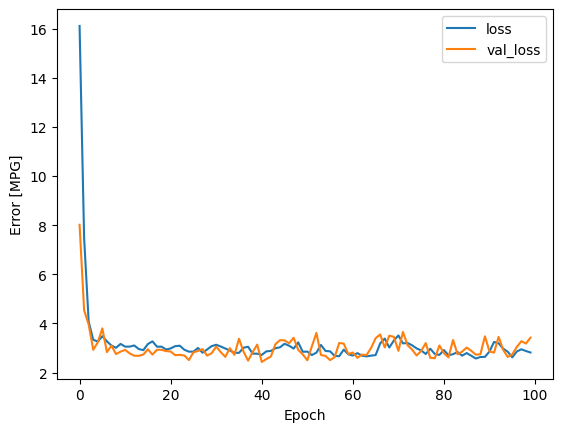

In [95]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()

In [96]:
dnn_model = tf.keras.Sequential([
    tf.keras.layers.Normalization(),  # Suponiendo que 'norm' es una capa de normalización
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

dnn_model.build(input_shape=(None, 4))  # Especificamos que la entrada tiene 4 características
dnn_model.summary()


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_5 (Normalization) │ (None, 4)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 32)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 202 (812.00 B)

 Trainable params: 193 (772.00 B)

 Non-trainable params: 9 (40.00 B)

creación de 3 casos diferentes al modelo base

Modelo 1

In [97]:
model3_1 = tf.keras.Sequential([
      norm,
      tf.keras.layers.Dense(16, activation='relu'),
      tf.keras.layers.Dense(1)
  ])


In [98]:
model3_1.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [99]:
%%time
history31 = model3_1.fit(
    train_X,
    train_y,
    epochs=100,
    validation_split = 0.2)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 20.6107 - val_loss: 13.4318
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 10.5222 - val_loss: 9.1522
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 8.2158 - val_loss: 4.5075
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 4.4592 - val_loss: 3.3904
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 3.1806 - val_loss: 3.0002
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 3.3554 - val_loss: 3.6253
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3.3799 - val_loss: 2.7910
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2.8521 - val_loss: 2.9638
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 3.1356 - val_loss: 3.1450
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 3.1928 - val_loss: 3.0345
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 3.2508 - val_loss: 2.9014
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 3.1942 - val

In [100]:
hist1 = pd.DataFrame(history31.history)
hist1['epoch'] = history31.epoch
hist1['model'] = 'Model_1'

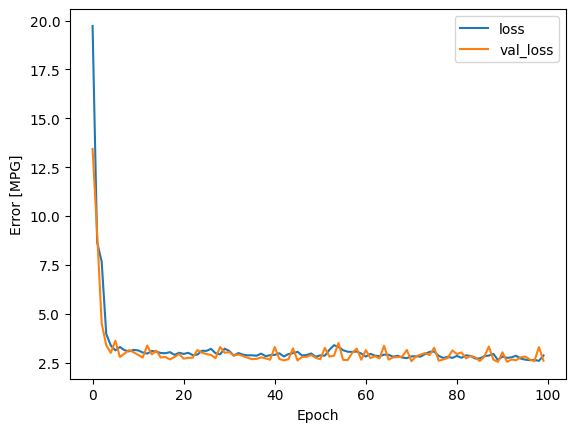

In [101]:
plt.plot(history31.history['loss'], label='loss')
plt.plot(history31.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()

Modelo 2

In [102]:
model3_2 = tf.keras.Sequential([
      norm,
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(1)
  ])

In [103]:
model3_2.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [104]:
%%time
history32 = model3_2.fit(
    train_X,
    train_y,
    epochs=100,
    validation_split = 0.2)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 18.1511 - val_loss: 9.8047
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 6.7684 - val_loss: 3.3336
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 4.0868 - val_loss: 4.0156
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 4.1414 - val_loss: 3.0949
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 3.3652 - val_loss: 3.4322
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 3.3391 - val_loss: 3.1083
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 3.3523 - val_loss: 4.3182
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 3.4929 - val_loss: 3.3124
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 3.1347 - val_loss: 2.9597
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 3.2663 - val_loss: 2.7368
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 3.0574 - val_loss: 2.8004
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.8324 - val_l

In [105]:
hist2 = pd.DataFrame(history32.history)
hist2['epoch'] = history32.epoch
hist2['model'] = 'Model_2'

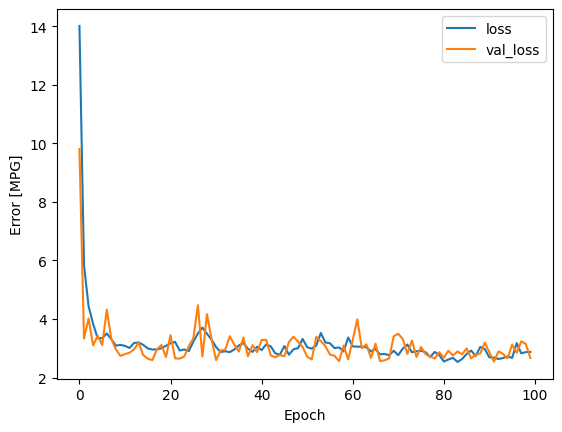

In [106]:
plt.plot(history32.history['loss'], label='loss')
plt.plot(history32.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()

Modelo 3

In [107]:
model3_3 = tf.keras.Sequential([
      norm,
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(1)
  ])

In [108]:
model3_3.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [109]:
%%time
history33 = model3_3.fit(
    train_X,
    train_y,
    epochs=100,
    validation_split = 0.2)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 17.1168 - val_loss: 5.0081
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 5.2408 - val_loss: 4.5550
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 4.7171 - val_loss: 3.9993
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 3.7434 - val_loss: 2.9988
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 3.2907 - val_loss: 2.7570
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 3.2679 - val_loss: 2.6813
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 2.9023 - val_loss: 2.9459
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 3.0710 - val_loss: 2.6917
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 2.9984 - val_loss: 2.7369
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 3.2217 - val_loss: 2.8476
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 3.2238 - val_loss: 3.2564
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 3.0047 - val_l

In [110]:
hist3 = pd.DataFrame(history33.history)
hist3['epoch'] = history33.epoch
hist3['model'] = 'Model_3'

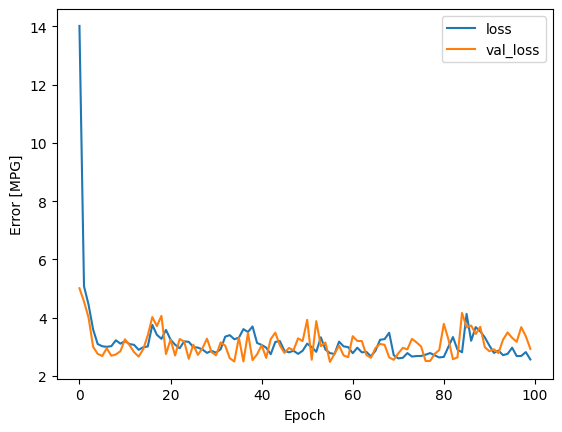

In [111]:
plt.plot(history33.history['loss'], label='loss')
plt.plot(history33.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()

In [112]:
hist_t = pd.concat([hist,hist1,hist2,hist3], ignore_index=True)

In [113]:
import seaborn as sns


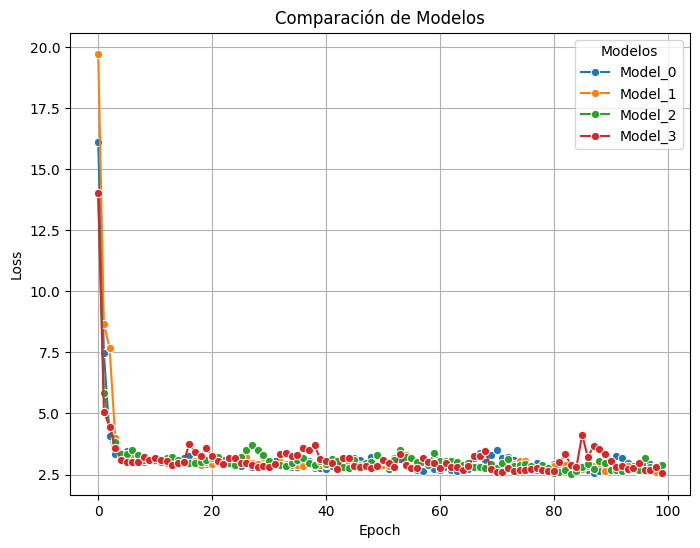

In [117]:

plt.figure(figsize=(8,6))

sns.lineplot(data=hist_t, x='epoch', y='loss', hue='model', linestyle='solid', marker='o')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Comparación de Modelos')
plt.legend(title="Modelos")
plt.grid(True)
plt.show()

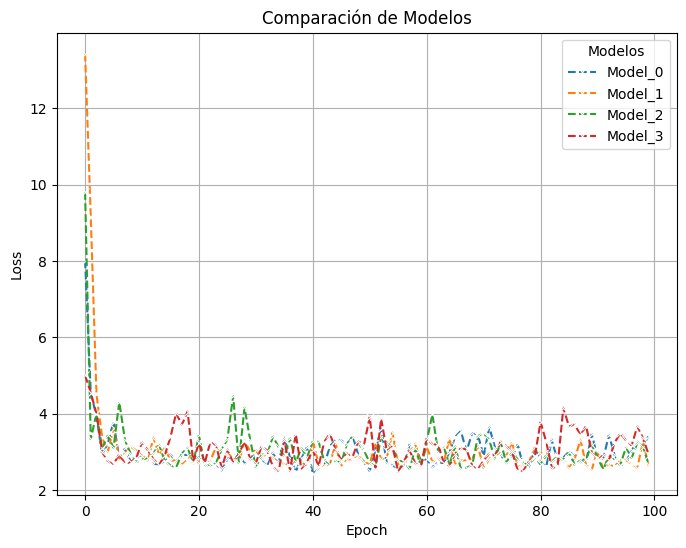

In [118]:

plt.figure(figsize=(8,6))
sns.lineplot(data=hist_t, x='epoch', y='val_loss', hue='model', linestyle='dashed', marker='x')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Comparación de Modelos')
plt.legend(title="Modelos")
plt.grid(True)
plt.show()

Las diferencias entre los modelos fueron mínimas, por lo que no se puede observar en la escala normal. Para esto, se graficó la diferencia entre cada modelo modificado con el original, generando los siguientes resultados.

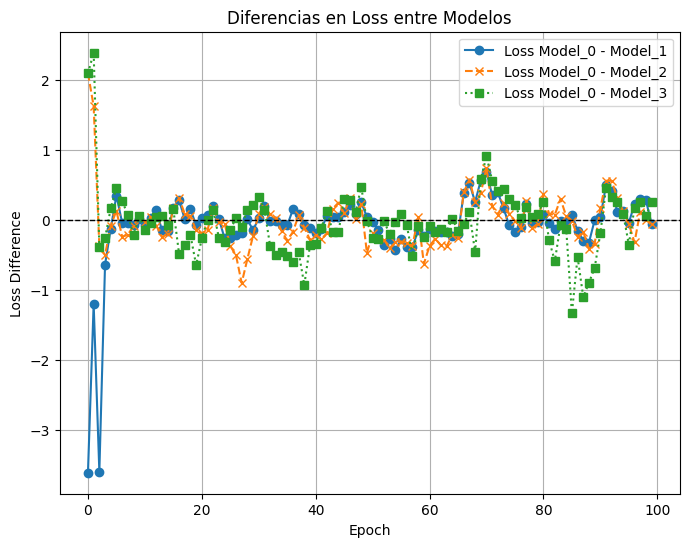

In [115]:



#Calcular las diferencias entre modelos
diff01 = hist['loss'] - hist1['loss']
diff02 = hist['loss'] - hist2['loss']
diff03 = hist['loss'] - hist3['loss']

#Graficar las diferencias
plt.figure(figsize=(8,6))
plt.plot(hist['epoch'], diff01, label='Loss Model_0 - Model_1', linestyle='solid', marker='o')
plt.plot(hist['epoch'], diff02, label='Loss Model_0 - Model_2', linestyle='dashed', marker='x')
plt.plot(hist['epoch'], diff03, label='Loss Model_0 - Model_3', linestyle='dotted', marker='s')

plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.xlabel('Epoch')
plt.ylabel('Loss Difference')
plt.title('Diferencias en Loss entre Modelos')
plt.legend()
plt.grid(True)
plt.show()


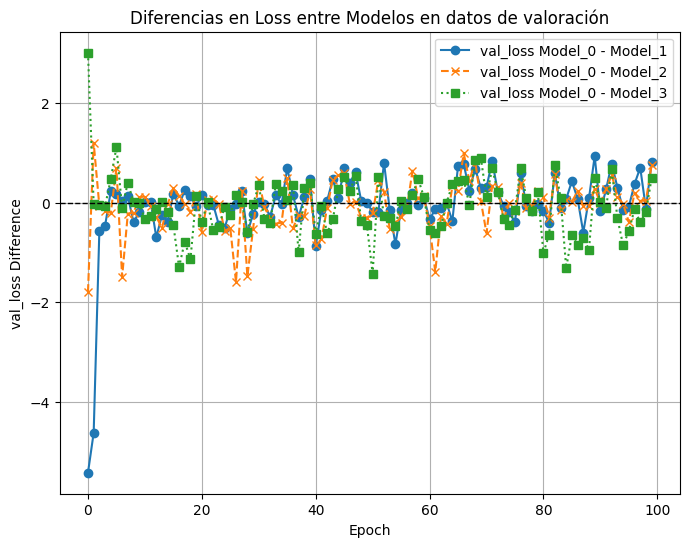

In [116]:


#Calcular las diferencias entre modelos
diff01 = hist['val_loss'] - hist1['val_loss']
diff02 = hist['val_loss'] - hist2['val_loss']
diff03 = hist['val_loss'] - hist3['val_loss']

#Graficar las diferencias
plt.figure(figsize=(8,6))
plt.plot(hist['epoch'], diff01, label='val_loss Model_0 - Model_1', linestyle='solid', marker='o')
plt.plot(hist['epoch'], diff02, label='val_loss Model_0 - Model_2', linestyle='dashed', marker='x')
plt.plot(hist['epoch'], diff03, label='val_loss Model_0 - Model_3', linestyle='dotted', marker='s')

plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.xlabel('Epoch')
plt.ylabel('val_loss Difference')
plt.title('Diferencias en Loss entre Modelos en datos de valoración')
plt.legend()
plt.grid(True)
plt.show()
